In [1]:
import os
import glob
import pandas as pd

In [2]:
# Define working directory
os.chdir(r"C:\Users\hguzm\Documents\000. Personal\Bootcamp\Proyectos\FinalProject-Spotify\Original_data")

In [3]:
# Use glob to match the pattern ‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# Combine all files in the list and export as CSV
df = pd.concat([pd.read_csv(f) for f in all_filenames ])
df.reset_index(drop=True, inplace=True)

#export to csv
df.to_csv( "spotify_data.csv", index=False, encoding='utf-8-sig')
df.head(5)

track             artist  \
0                 Lucky Man  Montgomery Gentry   
1            On The Hotline       Pretty Ricky   
2        Clouds Of Dementia         Candlemass   
3  Heavy Metal, Raise Hell!      Zwartketterij   
4           I Got A Feelin'   Billy Currington   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:4GiXBCUF7H6YfNQsnBRIzl         0.578   0.471    4    -7.270   
1  spotify:track:1zyqZONW985Cs4osz9wlsu         0.704   0.854   10    -5.477   
2  spotify:track:6cHZf7RbxXCKwEkgAZT4mY         0.162   0.836    9    -3.009   
3  spotify:track:2IjBPp2vMeX7LggzRN3iSX         0.188   0.994    4    -3.745   
4  spotify:track:1tF370eYXUcWwkIvaq3IGz         0.630   0.764    2    -4.353   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0289      0.368000           0.00000     0.159    0.532   
1     0       0.1830      0.018500           0.00000     0.148    0.688   
2     1       0.0473      0.000111           0.00457     0.174    0.300   
3     1       0.1660      0.000007           0.07840     0.192    0.333   
4     1       0.0275      0.363000           0.00000     0.125    0.631   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  133.061       196707               4    30.88059        13       1  
1   92.988       242587               4    41.51106        10       1  
2   86.964       338893               4    65.32887        13       0  
3  148.440       255667               4    58.59528         9       0  
4  112.098       193760               4    22.62384        10       1

In [4]:
# df.columns

In [5]:
# X = df.drop(['track', 'artist', 'uri'], axis=1)
# y = df.target

# print(X.shape, y.shape)

In [4]:
df2 = df.drop(['track', 'artist', 'uri'], axis=1)
df2.head(2)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.578   0.471    4    -7.270     1       0.0289        0.3680   
1         0.704   0.854   10    -5.477     0       0.1830        0.0185   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0               0.0     0.159    0.532  133.061       196707               4   
1               0.0     0.148    0.688   92.988       242587               4   

   chorus_hit  sections  target  
0    30.88059        13       1  
1    41.51106        10       1

In [40]:
#Validation of distribution of output values
df2.groupby("target").count()

danceability  energy    key  loudness   mode  speechiness  \
target                                                              
0              20553   20553  20553     20553  20553        20553   
1              20553   20553  20553     20553  20553        20553   

        acousticness  instrumentalness  liveness  valence  tempo  duration_ms  \
target                                                                          
0              20553             20553     20553    20553  20553        20553   
1              20553             20553     20553    20553  20553        20553   

        time_signature  chorus_hit  sections  
target                                        
0                20553       20553     20553  
1                20553       20553     20553

In [39]:
#Validation of correlation between variables
import numpy as np 
df3=df2.corr()
df3

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.206128  0.015433  0.274160 -0.032743   
energy                0.206128  1.000000  0.022523  0.772628 -0.033780   
key                   0.015433  0.022523  1.000000  0.008438 -0.140455   
loudness              0.274160  0.772628  0.008438  1.000000  0.000509   
mode                 -0.032743 -0.033780 -0.140455  0.000509  1.000000   
speechiness           0.156452  0.122430  0.026515  0.069241 -0.059636   
acousticness         -0.261252 -0.715088 -0.024178 -0.566548  0.049961   
instrumentalness     -0.301915 -0.208153 -0.013101 -0.374301 -0.075992   
liveness             -0.115251  0.157779  0.000668  0.086708  0.008886   
valence               0.553858  0.341427  0.007742  0.271775  0.035636   
tempo                -0.066541  0.224018  0.001154  0.169453  0.027053   
duration_ms          -0.063030  0.011830  0.015493 -0.049890 -0.074828   
time_signature        0.191664  0.196072  0.004757  0.165520 -0.009483   
chorus_hit           -0.036277  0.009620  0.010264 -0.013401 -0.022594   
sections             -0.058615 -0.040233  0.006784 -0.080065 -0.057095   
target                0.346097  0.177142  0.009883  0.286034  0.079614   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.156452     -0.261252         -0.301915 -0.115251   
energy               0.122430     -0.715088         -0.208153  0.157779   
key                  0.026515     -0.024178         -0.013101  0.000668   
loudness             0.069241     -0.566548         -0.374301  0.086708   
mode                -0.059636      0.049961         -0.075992  0.008886   
speechiness          1.000000     -0.083948         -0.084092  0.131488   
acousticness        -0.083948      1.000000          0.204137 -0.030765   
instrumentalness    -0.084092      0.204137          1.000000 -0.050582   
liveness             0.131488     -0.030765         -0.050582  1.000000   
valence              0.001528     -0.195331         -0.287047  0.000784   
tempo                0.036854     -0.179700         -0.053618  0.024861   
duration_ms          0.007631     -0.070271          0.106551  0.005336   
time_signature       0.021085     -0.188139         -0.077980  0.004773   
chorus_hit           0.012972     -0.012409          0.048654  0.037981   
sections            -0.008636     -0.016824          0.081188 -0.011742   
target              -0.040835     -0.246036         -0.407638 -0.051445   

                   valence     tempo  duration_ms  time_signature  chorus_hit  \
danceability      0.553858 -0.066541    -0.063030        0.191664   -0.036277   
energy            0.341427  0.224018     0.011830        0.196072    0.009620   
key               0.007742  0.001154     0.015493        0.004757    0.010264   
loudness          0.271775  0.169453    -0.049890        0.165520   -0.013401   
mode              0.035636  0.027053    -0.074828       -0.009483   -0.022594   
speechiness       0.001528  0.036854     0.007631        0.021085    0.012972   
acousticness     -0.195331 -0.179700    -0.070271       -0.188139   -0.012409   
instrumentalness -0.287047 -0.053618     0.106551       -0.077980    0.048654   
liveness          0.000784  0.024861     0.005336        0.004773    0.037981   
valence           1.000000  0.107901    -0.172166        0.155669   -0.059120   
tempo             0.107901  1.000000    -0.024318        0.007659   -0.056054   
duration_ms      -0.172166 -0.024318     1.000000        0.018454    0.093875   
time_signature    0.155669  0.007659     0.018454        1.000000   -0.011281   
chorus_hit       -0.059120 -0.056054     0.093875       -0.011281    1.000000   
sections         -0.133527  0.024905     0.888952        0.008424   -0.085920   
target            0.251147  0.032649    -0.073820        0.104884   -0.046409   

                  sections    target  
danceability     -0.058615  0.346097  
energy           -0.040233 

In [ ]:
#1. Sin key - crih
#2. Sin Tempo - chris  / - purvi
#3. Sin speechiness / purvi  -grecia
#4. Sin chorus_hit  / grecia 
#5. Sin key, Tempo, speechiness, chorus_hit- heidy


In [5]:
# Reformat data
data = df2.values
X = data[:, 0:15]  
y = data[:, 15]

print(data.shape, X.shape, y.shape)
data
# X[0]
# y

(41106, 16) (41106, 15) (41106,)


array([[ 0.578  ,  0.471  ,  4.     , ..., 30.88059, 13.     ,  1.     ],
       [ 0.704  ,  0.854  , 10.     , ..., 41.51106, 10.     ,  1.     ],
       [ 0.162  ,  0.836  ,  9.     , ..., 65.32887, 13.     ,  0.     ],
       ...,
       [ 0.562  ,  0.314  , 10.     , ..., 21.11763, 10.     ,  1.     ],
       [ 0.622  ,  0.781  ,  7.     , ..., 47.13558, 11.     ,  0.     ],
       [ 0.664  ,  0.739  ,  2.     , ..., 42.50341, 14.     ,  1.     ]])

In [8]:
print(len(y))
print(len(X.T[0]))
print(len(X.T[:0]))
print(len(X[:0]))


41106
41106
0
0


Text(0, 0.5, 'energy')

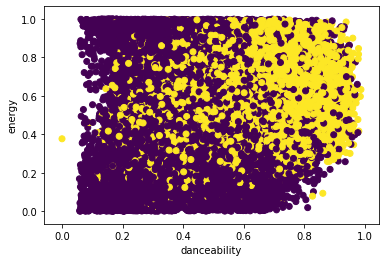

In [6]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# plt.scatter(X.T[0],X.T[1], c=y,cmap='viridis')
# plt.xlabel(df2.columns[0])
# plt.ylabel(df2.columns[1])



In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

## Data Preprocessing

In [11]:
# #Scale features (X)
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test) 

# X_train_scaled

array([[ 1.35315003, -0.22396167,  1.07008741, ...,  0.24964134,
         0.64353579,  0.1078218 ],
       [-0.03430522,  0.9971179 ,  1.07008741, ...,  0.24964134,
         0.88344544, -0.71419692],
       [-0.2599077 ,  0.34296813,  1.07008741, ...,  0.24964134,
         0.72333873, -0.91970159],
       ...,
       [ 0.16873701, -0.838466  ,  1.07008741, ...,  0.24964134,
         0.07947695,  1.13534519],
       [-0.71111266, -1.65912662,  0.50456543, ...,  0.24964134,
         0.66731336, -0.50869224],
       [-1.39920022, -1.31024674,  1.07008741, ..., -2.13381886,
        -0.45146094,  0.1078218 ]])

In [8]:
#Scale features (X) using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler(feature_range=(0,1)).fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

X_train_scaled

array([[0.78947368, 0.52283395, 0.81818182, ..., 0.8       , 0.19905999,
        0.06508876],
       [0.54048583, 0.83094117, 0.81818182, ..., 0.8       , 0.21633373,
        0.04142012],
       [0.5       , 0.66588373, 0.81818182, ..., 0.8       , 0.20480589,
        0.03550296],
       ...,
       [0.57692308, 0.36777999, 0.81818182, ..., 0.8       , 0.15844718,
        0.09467456],
       [0.41902834, 0.16070793, 0.63636364, ..., 0.8       , 0.200772  ,
        0.04733728],
       [0.29554656, 0.24873856, 0.81818182, ..., 0.6       , 0.12021911,
        0.06508876]])

One-hot encode the labels

In [9]:
#One-hot encode output labels (y)
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

y_train_categorical

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

## Creating and defining our Model Architecture

In [10]:
#First create a sequential model
from tensorflow.keras.models import Sequential

model = Sequential() 

In [30]:
#For categorical data, we use a classifier model (Softmax)
from tensorflow.keras.layers import Dense
number_inputs = 15  
number_hidden_nodes = 80

model = Sequential() 
#Create hidden layer
model.add(Dense(units=number_hidden_nodes,activation='relu', input_dim=number_inputs))
model.add(Dense(units=120,activation='relu'))
model.add(Dense(units=80,activation='relu'))

#Create output layer
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax')) 

Number of Hidden Nodes 
https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw#:~:text=The%20number%20of%20hidden%20neurons,size%20of%20the%20input%20layer.

In [31]:
#Model Summary
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                1280      
_________________________________________________________________
dense_7 (Dense)              (None, 120)               9720      
_________________________________________________________________
dense_8 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 162       
Total params: 20,842
Trainable params: 20,842
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Compile the Model
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

In [33]:
#Training the Model
import tensorflow as tf

# callbacks = [tf.keras.callbacks.EarlyStopping(patience=2, monitor="val_loss")]
# model.fit(X_train_scaled,y_train_categorical,epochs=100, callbacks=callbacks, batch_size=800, shuffle=True, verbose=2)
# # callbacks=["earlystopping"]

model.fit(X_train_scaled,y_train_categorical,epochs=500, batch_size=2000, shuffle=True, verbose=2)

poch 162/500
16/16 - 0s - loss: 0.4332 - accuracy: 0.7929
Epoch 163/500
16/16 - 0s - loss: 0.4265 - accuracy: 0.7986
Epoch 164/500
16/16 - 0s - loss: 0.4317 - accuracy: 0.7937
Epoch 165/500
16/16 - 0s - loss: 0.4331 - accuracy: 0.7931
Epoch 166/500
16/16 - 0s - loss: 0.4288 - accuracy: 0.7984
Epoch 167/500
16/16 - 0s - loss: 0.4264 - accuracy: 0.7971
Epoch 168/500
16/16 - 0s - loss: 0.4269 - accuracy: 0.7968
Epoch 169/500
16/16 - 0s - loss: 0.4358 - accuracy: 0.7915
Epoch 170/500
16/16 - 0s - loss: 0.4261 - accuracy: 0.7977
Epoch 171/500
16/16 - 0s - loss: 0.4267 - accuracy: 0.7978
Epoch 172/500
16/16 - 0s - loss: 0.4230 - accuracy: 0.8005
Epoch 173/500
16/16 - 0s - loss: 0.4240 - accuracy: 0.7989
Epoch 174/500
16/16 - 0s - loss: 0.4247 - accuracy: 0.7983
Epoch 175/500
16/16 - 0s - loss: 0.4299 - accuracy: 0.7949
Epoch 176/500
16/16 - 0s - loss: 0.4255 - accuracy: 0.8001
Epoch 177/500
16/16 - 0s - loss: 0.4230 - accuracy: 0.8003
Epoch 178/500
16/16 - 0s - loss: 0.4238 - accuracy: 0.797

In [34]:
# model._losses

[]

## Validation of the Model

In [35]:
#Evaluate the Model using the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
    
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 1s - loss: 0.5813 - accuracy: 0.7617
Loss: 0.5812590718269348, Accuracy: 0.7617008686065674


## Saving the Trained Model

In [19]:
# # Save the model
# Define working directory
os.chdir(r"C:\Users\hguzm\Documents\000. Personal\Bootcamp\Proyectos\FinalProject-Spotify")
model.save("spotify_DeepLearning_Model.h5")

## Loading a Model

In [20]:
# Load the model  
from tensorflow.keras.models import load_model
# Define working directory
os.chdir(r"C:\Users\hguzm\Documents\000. Personal\Bootcamp\Proyectos\FinalProject-Spotify")
model = load_model("spotify_DeepLearning_Model.h5")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 32        
Total params: 272
Trainable params: 272
Non-trainable params: 0
_________________________________________________________________


## Validation of the Model

In [22]:
#Evaluate the Model using the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
    
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 0s - loss: 0.4650 - accuracy: 0.7780
Loss: 0.4649645686149597, Accuracy: 0.7779507637023926


In [23]:
# #Making Predictions with new data
# new_data = np.array([[0.2, 0.3, 0.4,0.2, 0.3, 0.4,0.2, 0.3, 0.4,0.2, 0.3, 0.4,0.2, 0.3, 1]])  # AQUI IRIA INFORMACIÓN DEL API
# print(f"Predicted class: {model.predict_classes(new_data)}")

## Deep Learning

In [24]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

deep_model = Sequential()

number_inputs = 15  
number_hidden_nodes = 15
number_hidden_nodes2 = 13
number_classes = 2

deep_model.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))
deep_model.add(Dense(units=number_hidden_nodes2, activation='relu'))
deep_model.add(Dense(units=number_classes, activation='softmax'))

In [25]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                208       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 28        
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Compile the model
deep_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Train the model
deep_model.fit(X_train_scaled, y_train_categorical, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
964/964 - 1s - loss: 0.5371 - accuracy: 0.7202
Epoch 2/100
964/964 - 1s - loss: 0.4958 - accuracy: 0.7566
Epoch 3/100
964/964 - 1s - loss: 0.4875 - accuracy: 0.7622
Epoch 4/100
964/964 - 1s - loss: 0.4818 - accuracy: 0.7670
Epoch 5/100
964/964 - 1s - loss: 0.4775 - accuracy: 0.7689
Epoch 6/100
964/964 - 1s - loss: 0.4741 - accuracy: 0.7725
Epoch 7/100
964/964 - 1s - loss: 0.4717 - accuracy: 0.7748
Epoch 8/100
964/964 - 1s - loss: 0.4692 - accuracy: 0.7773
Epoch 9/100
964/964 - 1s - loss: 0.4677 - accuracy: 0.7780
Epoch 10/100
964/964 - 1s - loss: 0.4665 - accuracy: 0.7765
Epoch 11/100
964/964 - 1s - loss: 0.4658 - accuracy: 0.7782
Epoch 12/100
964/964 - 1s - loss: 0.4642 - accuracy: 0.7802
Epoch 13/100
964/964 - 1s - loss: 0.4634 - accuracy: 0.7806
Epoch 14/100
964/964 - 1s - loss: 0.4628 - accuracy: 0.7813
Epoch 15/100
964/964 - 1s - loss: 0.4615 - accuracy: 0.7816
Epoch 16/100
964/964 - 1s - loss: 0.4614 - accuracy: 0.7800
Epoch 17/100
964/964 - 1s - loss: 0.4611 - accura

## Compare the models 

In [27]:
# model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
# Dmodel_loss, Dmodel_accuracy = deep_model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
# print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
# print(f"Deep Neural Network - Loss: {Dmodel_loss}, Accuracy: {Dmodel_accuracy}")

In [28]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
Dmodel_loss, Dmodel_accuracy = deep_model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")
print(f"Deep Neural Network - Loss: {Dmodel_loss}, Accuracy: {Dmodel_accuracy}")

322/322 - 0s - loss: 0.4650 - accuracy: 0.7780
322/322 - 0s - loss: 0.4634 - accuracy: 0.7748
Normal Neural Network - Loss: 0.4649645686149597, Accuracy: 0.7779507637023926
Deep Neural Network - Loss: 0.4634192883968353, Accuracy: 0.7748370170593262
